## Computational complexity of algorithms, accuracy and energy consumption


Pytorch Vision models \
Models are pretrained on Imagenet dataset \
Finetuning for image classification task "ants or bees"

Epochs: 50 \
Batchsize: 16



In [49]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from scipy import stats
from sklearn import metrics
%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.size'] = 12

plt.style.use('tableau-colorblind10')

In [2]:
url = 'logs/models.txt'
df = pd.read_csv(url)

In [3]:
df.describe()

,macs,parameters
count,3.500000e+01,3.500000e+01
mean,6.351510e+09,5.052139e+07
std,6.685961e+09,5.508621e+07
min,4.252426e+07,1.235496e+06
25%,5.659043e+08,5.332784e+06
50%,4.111515e+09,2.383457e+07
75%,1.133300e+10,1.078390e+08
max,2.279560e+10,1.436782e+08


In [4]:
df['GFLOPS'] = (df['macs']) / (10 ** 9) 
df['TFLOPS'] = (df['macs']) / (10 ** 12)
df['Params(Million)'] = df['parameters'] / (10 ** 6)
df['Log'] = np.log(df['macs'])
df['Training 1 epoch(pfs-days)'] = df['GFLOPS'] * 2 * 3 * (1.2 * (10 ** 6))

In [5]:
print(df.GFLOPS.count())
df.head()

35


,model,macs,parameters,GFLOPS,TFLOPS,Params(Million),Log,Training 1 epoch(pfs-days)
0,alexnet,7.146919e+08,61100840.0,0.714692,0.000715,61.100840,20.387362,5.145782e+06
1,densenet121,2.865672e+09,7978856.0,2.865672,0.002866,7.978856,21.776069,2.063284e+07
2,densenet161,7.787013e+09,28681000.0,7.787013,0.007787,28.681000,22.775723,5.606649e+07
3,densenet169,3.398071e+09,14149480.0,3.398071,0.003398,14.149480,21.946474,2.446611e+07
4,densenet201,4.340971e+09,20013928.0,4.340971,0.004341,20.013928,22.191364,3.125499e+07


In [6]:
# fig = plt.figure(figsize=(12,7))
# plt.plot(df['model'],df['GFLOPS'],marker = "o",color='tab:green')
# plt.plot(df['model'],df['Params(Million)'],marker = "o",color='tab:blue')
# plt.xticks( rotation='vertical')
# plt.tight_layout()
# plt.show()

In [7]:
# fig = plt.figure(figsize=(12,7))
# plt.plot(df['model'],df['Training 1 epoch(pfs-days)'],marker = "o",color='tab:green')
# plt.xticks( rotation='vertical')
# plt.tight_layout()
# plt.show()

In [8]:
url = "logs/accuracy.csv" ##top 1 and top 5 error
df_accuracy = pd.read_csv(url)
print(df_accuracy.top1.count())

29


In [9]:
merge_df = df.merge(df_accuracy, on='model')

In [10]:
print(merge_df.top1.count())
merge_df.head()

29


,model,macs,parameters,GFLOPS,TFLOPS,Params(Million),Log,Training 1 epoch(pfs-days),top1,top5
0,alexnet,7.146919e+08,61100840.0,0.714692,0.000715,61.100840,20.387362,5.145782e+06,43.45,20.91
1,densenet121,2.865672e+09,7978856.0,2.865672,0.002866,7.978856,21.776069,2.063284e+07,25.35,7.83
2,densenet161,7.787013e+09,28681000.0,7.787013,0.007787,28.681000,22.775723,5.606649e+07,22.35,6.20
3,densenet169,3.398071e+09,14149480.0,3.398071,0.003398,14.149480,21.946474,2.446611e+07,24.00,7.00
4,densenet201,4.340971e+09,20013928.0,4.340971,0.004341,20.013928,22.191364,3.125499e+07,22.80,6.43


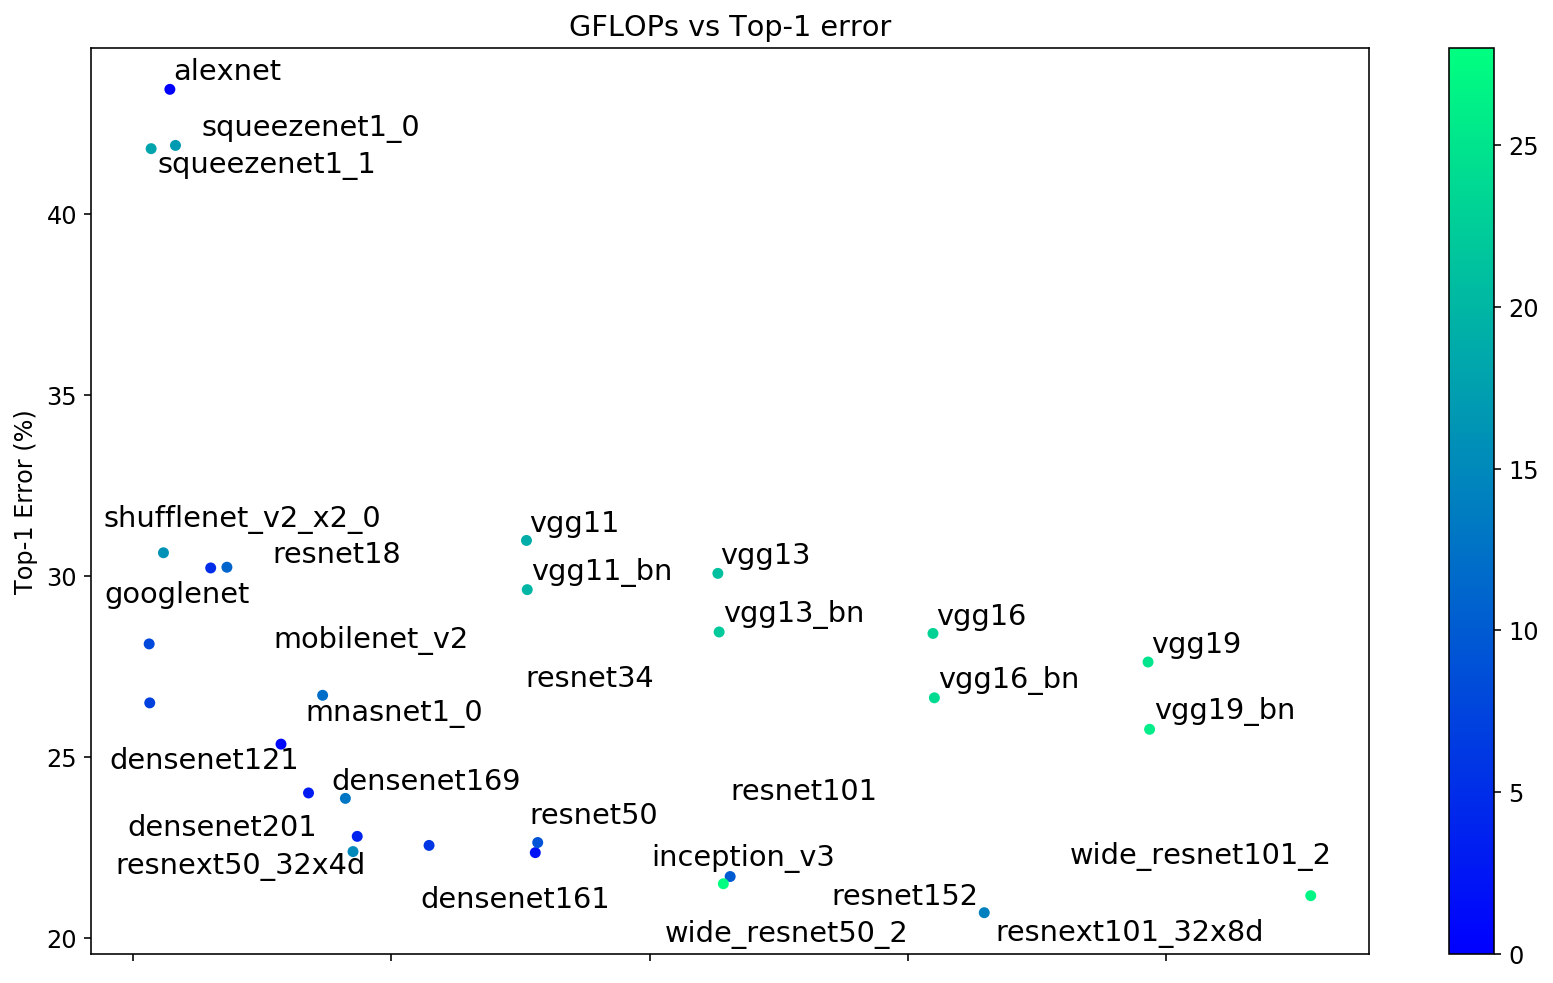

In [11]:
from matplotlib import cm
from adjustText import adjust_text
cmap = cm.get_cmap('winter')
#merge_df.plot.scatter(x ='top1', y='GFLOPS')

ax = merge_df.plot('GFLOPS', 'top1', kind='scatter',
        c=range(len(merge_df)), colormap=cmap, figsize=(12,7),
                  title="GFLOPs vs Top-1 error")
ax.set_xlabel("GFLOPs")
ax.set_ylabel("Top-1 Error (%)")
#merge_df[['GFLOPS','top1','model']].apply(lambda row: ax.text(*row),axis=1);
texts = [ax.text(x, y, name,size='large') 
         for x, y, name in zip(merge_df['GFLOPS'],merge_df['top1'],merge_df['model'])]
#ax.text(0.823441, 41.90, 'squeezenet1_0' )
# needs citation https://github.com/Phlya/adjustText
#colormap.remove()
adjust_text(texts)
plt.tight_layout()
ax.figure.savefig('viz/top1error.png',dpi=300)


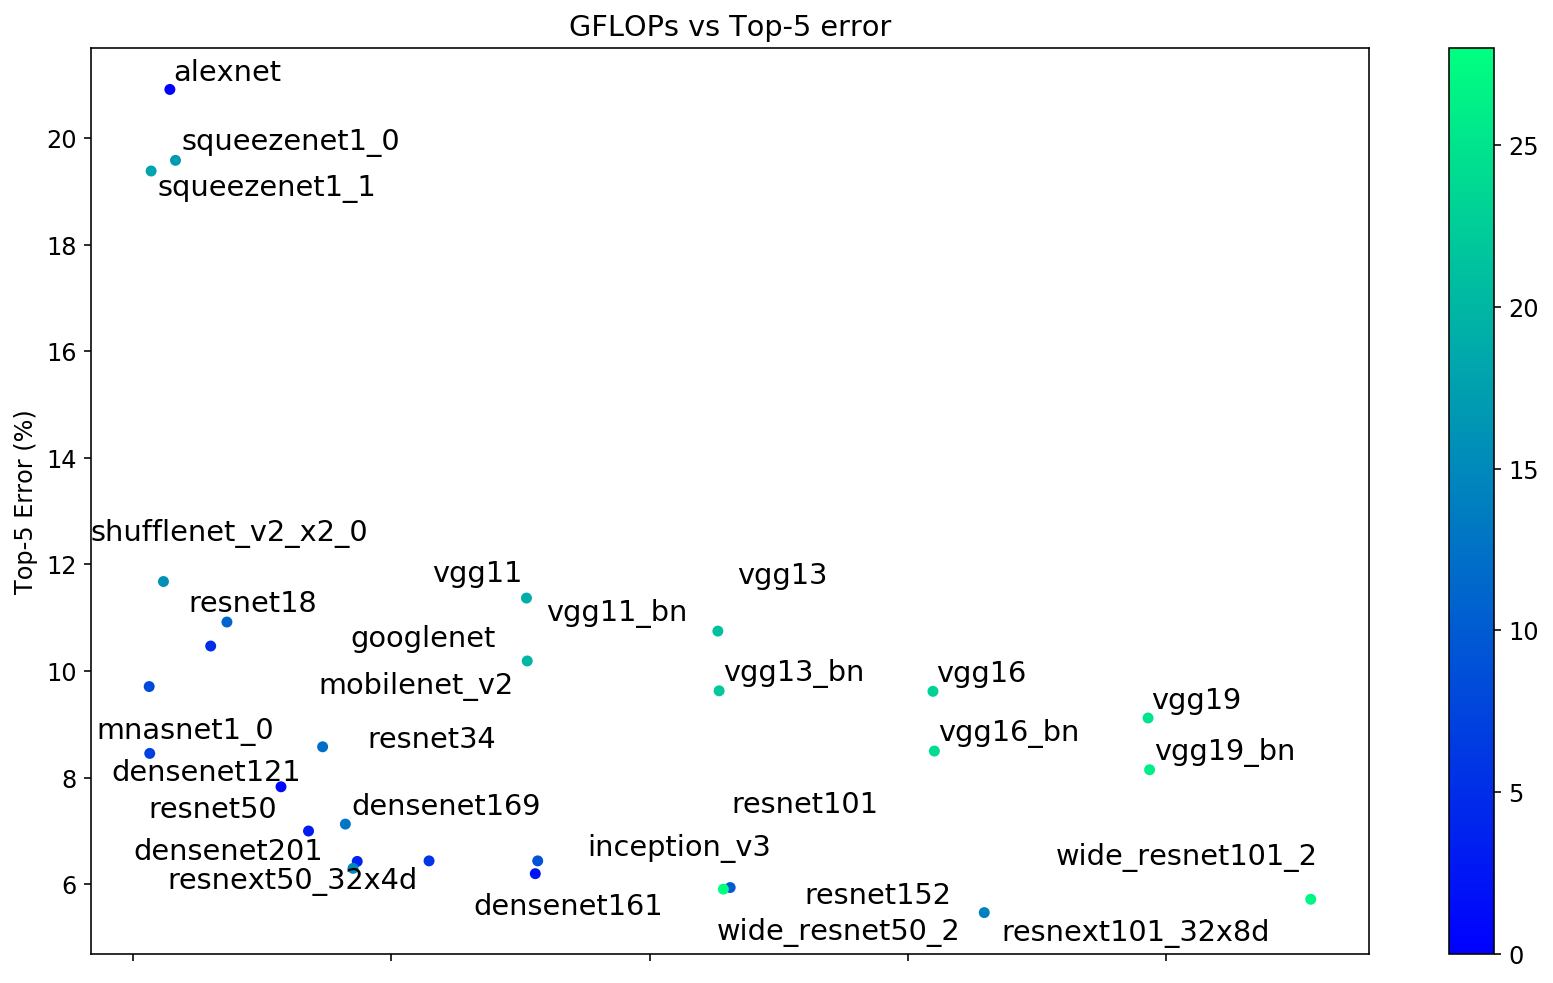

In [38]:
cmap1= cm.get_cmap('winter')
ax = merge_df.plot('GFLOPS', 'top5', kind='scatter',
        c=range(len(merge_df)),colormap=cmap1, figsize=(12,7),
                  title="GFLOPs vs Top-5 error")
ax.set_xlabel("GFLOPs")
ax.set_ylabel("Top-5 Error (%)")
#merge_df[['GFLOPS','top5','model']].apply(lambda row: ax.text(*row),axis=1);
texts = [ax.text(x, y, name,size='large') 
         for x, y, name in zip(merge_df['GFLOPS'],merge_df['top5'],merge_df['model'])]
adjust_text(texts)
plt.tight_layout()
#ax.figure.savefig('viz/top5error.png',dpi=300)

In [39]:
x, y = merge_df['GFLOPS'],merge_df['top5'] 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print("R squared", r_value ** 2)

slope -0.26447035797614316 
intercept 11.457116334379469
r_value -0.43211360774286034
p_value 0.019237046397276903
std_err 0.10622253088720421
R squared 0.18672216999655056


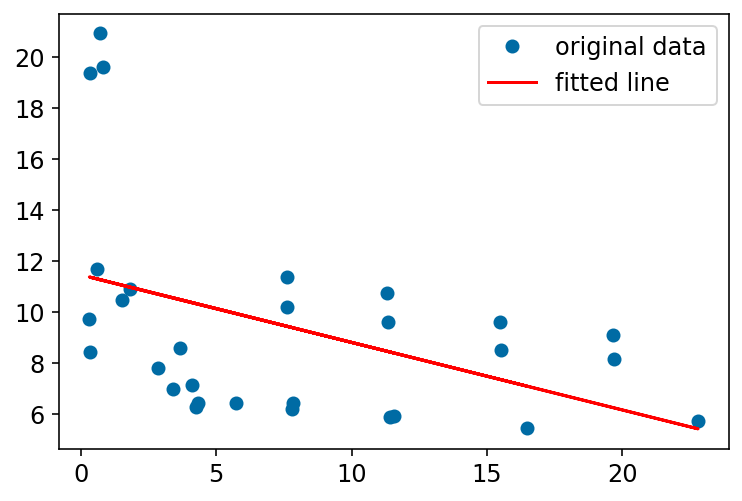

In [40]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

The complexity measured in FLOPs does not necessarily improve the accuracy (or decrease the error).

However, within the same architecture, e.g., VGG and resnet, the error decreases linearly with FLOPs

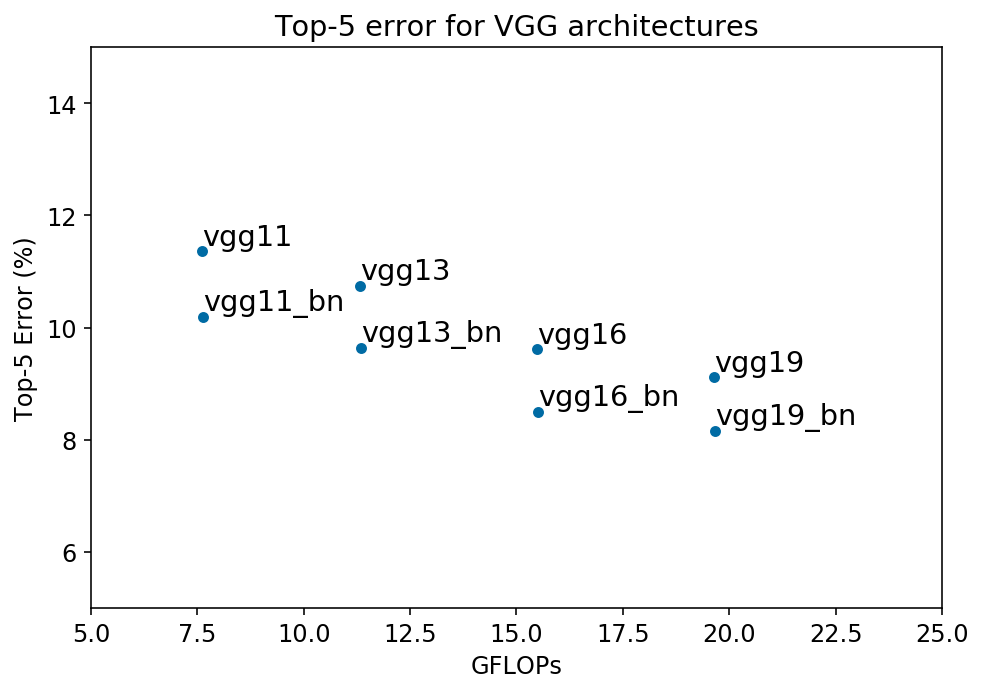

In [41]:
vggset = ['vgg11','vgg13','vgg16','vgg19','vgg11_bn','vgg13_bn','vgg16_bn','vgg19_bn']
vgg = merge_df.loc[merge_df.model.isin(vggset)]
ax = vgg.plot('GFLOPS', 'top5', kind='scatter',
         figsize=(7,5))
ax.set_xlim(5,25)
ax.set_ylim(5,15)
ax.set_xlabel("GFLOPs")
ax.set_ylabel("Top-5 Error (%)")
ax.set_title("Top-5 error for VGG architectures")
vgg[['GFLOPS','top5','model']].apply(lambda row: ax.text(*row,ha='left',va='bottom',size='large'),axis=1);
plt.tight_layout()
#ax.figure.savefig("viz/vggtop5error.png",dpi=300)

In [42]:
x, y = vgg['GFLOPS'],vgg['top5'] 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print("R squared", r_value ** 2)

slope -0.1881132778939686 
intercept 12.211244926500065
r_value -0.8313541476640571
p_value 0.010525762985377246
std_err 0.05133715042665655
R squared 0.691149718838231


## power monitor readings

In [12]:
df_reading = pd.read_csv("logs/finetune_pm_readings.csv")

In [13]:
df_reading['last_changed'] = pd.to_datetime(df_reading['last_changed'], errors='coerce')
df_reading.dropna(subset=['last_changed'], inplace=True)
df_reading.set_index('last_changed', inplace=True)

In [14]:
df_reading.tail()

,entity_id,node_id,power_consumption,unit
last_changed,,,,
2020-05-30 14:32:33.790128+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.784,W
2020-05-30 14:32:36.793057+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.675,W
2020-05-30 14:32:39.782380+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.729,W
2020-05-30 14:32:42.790067+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.778,W
2020-05-30 14:32:45.788001+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.794,W


In [17]:
df_time_interval = pd.read_csv("logs/finetune.csv")

In [18]:
print(df_time_interval.model.count())
df_time_interval.head()

20


,model,start_time,end_time
0,resnet18,2020-07-29 11:55:45.620879,2020-07-29 11:56:42.351618
1,resnet34,2020-07-29 11:56:42.723568,2020-07-29 11:57:55.600710
2,resnet50,2020-07-29 11:57:56.029574,2020-07-29 11:59:44.015472
3,resnet101,2020-07-29 11:59:44.778311,2020-07-29 12:02:22.085273
4,resnet152,2020-07-29 12:02:23.109644,2020-07-29 12:05:53.602304


In [19]:
df_time_interval['start_seconds']= [datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S.%f") - timedelta(hours=1, minutes=0)
                                  for start_time in df_time_interval.start_time]
df_time_interval['end_seconds'] = [datetime.strptime(end_time, "%Y-%m-%d %H:%M:%S.%f") - timedelta(hours=1, minutes=0)
                                for end_time in df_time_interval.end_time]
df_time_interval['total_time'] = df_time_interval['end_seconds'] - df_time_interval['start_seconds']
df_time_interval['total_time'] = df_time_interval['total_time'].apply(lambda x: x.total_seconds())
df_time_interval.head()

,model,start_time,end_time,start_seconds,end_seconds,total_time
0,resnet18,2020-07-29 11:55:45.620879,2020-07-29 11:56:42.351618,2020-07-29 10:55:45.620879,2020-07-29 10:56:42.351618,56.730739
1,resnet34,2020-07-29 11:56:42.723568,2020-07-29 11:57:55.600710,2020-07-29 10:56:42.723568,2020-07-29 10:57:55.600710,72.877142
2,resnet50,2020-07-29 11:57:56.029574,2020-07-29 11:59:44.015472,2020-07-29 10:57:56.029574,2020-07-29 10:59:44.015472,107.985898
3,resnet101,2020-07-29 11:59:44.778311,2020-07-29 12:02:22.085273,2020-07-29 10:59:44.778311,2020-07-29 11:02:22.085273,157.306962
4,resnet152,2020-07-29 12:02:23.109644,2020-07-29 12:05:53.602304,2020-07-29 11:02:23.109644,2020-07-29 11:05:53.602304,210.492660


In [20]:
df_time_interval['s_date'] = [x.date().strftime("%Y-%m-%d") for x in df_time_interval["start_seconds"]]
df_time_interval['e_date'] = [x.date().strftime("%Y-%m-%d") for x in df_time_interval["end_seconds"]]
df_time_interval['s_time'] = [x.time().strftime("%H:%M:%S") for x in df_time_interval["start_seconds"]]
df_time_interval['e_time'] = [x.time().strftime("%H:%M:%S") for x in df_time_interval["end_seconds"]]
df_time_interval.head()

,model,start_time,end_time,start_seconds,end_seconds,total_time,s_date,e_date,s_time,e_time
0,resnet18,2020-07-29 11:55:45.620879,2020-07-29 11:56:42.351618,2020-07-29 10:55:45.620879,2020-07-29 10:56:42.351618,56.730739,2020-07-29,2020-07-29,10:55:45,10:56:42
1,resnet34,2020-07-29 11:56:42.723568,2020-07-29 11:57:55.600710,2020-07-29 10:56:42.723568,2020-07-29 10:57:55.600710,72.877142,2020-07-29,2020-07-29,10:56:42,10:57:55
2,resnet50,2020-07-29 11:57:56.029574,2020-07-29 11:59:44.015472,2020-07-29 10:57:56.029574,2020-07-29 10:59:44.015472,107.985898,2020-07-29,2020-07-29,10:57:56,10:59:44
3,resnet101,2020-07-29 11:59:44.778311,2020-07-29 12:02:22.085273,2020-07-29 10:59:44.778311,2020-07-29 11:02:22.085273,157.306962,2020-07-29,2020-07-29,10:59:44,11:02:22
4,resnet152,2020-07-29 12:02:23.109644,2020-07-29 12:05:53.602304,2020-07-29 11:02:23.109644,2020-07-29 11:05:53.602304,210.492660,2020-07-29,2020-07-29,11:02:23,11:05:53


In [21]:
def power_mean(s_date,e_date,s_time,e_time):
    subset_df = df_reading.loc[s_date:e_date].between_time(s_time, e_time)[['power_consumption']]
    return subset_df['power_consumption'].mean()


In [27]:
def energy_consumption(s_date,e_date,s_time,e_time):
    subset_df = df_reading.loc[s_date:e_date].between_time(s_time, e_time)[['power_consumption']]
    return ((subset_df['power_consumption']).sum() * 3) / (1000 * 3600)

In [28]:
for index, row in df_time_interval.iterrows(): 
    df_time_interval.at[index,'empirical'] = energy_consumption(row['s_date'],row['e_date'],
                                            row['s_time'],row['e_time'])

In [22]:
# for index, row in df_time_interval.iterrows(): 
#     df_time_interval.at[index,'mean_power'] = power_mean(row['s_date'],row['e_date'],
#                                             row['s_time'],row['e_time'])

In [23]:
# df_time_interval['power'] = df_time_interval['mean_power'] * df_time_interval['total_time']
# df_time_interval.head()

,model,start_time,end_time,start_seconds,end_seconds,total_time,s_date,e_date,s_time,e_time,mean_power,power
0,resnet18,2020-07-29 11:55:45.620879,2020-07-29 11:56:42.351618,2020-07-29 10:55:45.620879,2020-07-29 10:56:42.351618,56.730739,2020-07-29,2020-07-29,10:55:45,10:56:42,274.591579,15577.783197
1,resnet34,2020-07-29 11:56:42.723568,2020-07-29 11:57:55.600710,2020-07-29 10:56:42.723568,2020-07-29 10:57:55.600710,72.877142,2020-07-29,2020-07-29,10:56:42,10:57:55,304.802917,22213.165440
2,resnet50,2020-07-29 11:57:56.029574,2020-07-29 11:59:44.015472,2020-07-29 10:57:56.029574,2020-07-29 10:59:44.015472,107.985898,2020-07-29,2020-07-29,10:57:56,10:59:44,322.651361,34841.796971
3,resnet101,2020-07-29 11:59:44.778311,2020-07-29 12:02:22.085273,2020-07-29 10:59:44.778311,2020-07-29 11:02:22.085273,157.306962,2020-07-29,2020-07-29,10:59:44,11:02:22,344.940887,54261.602971
4,resnet152,2020-07-29 12:02:23.109644,2020-07-29 12:05:53.602304,2020-07-29 11:02:23.109644,2020-07-29 11:05:53.602304,210.492660,2020-07-29,2020-07-29,11:02:23,11:05:53,345.404100,72705.027784


In [29]:
new_df = df_time_interval.merge(merge_df, on='model')
new_df.model.count()

20

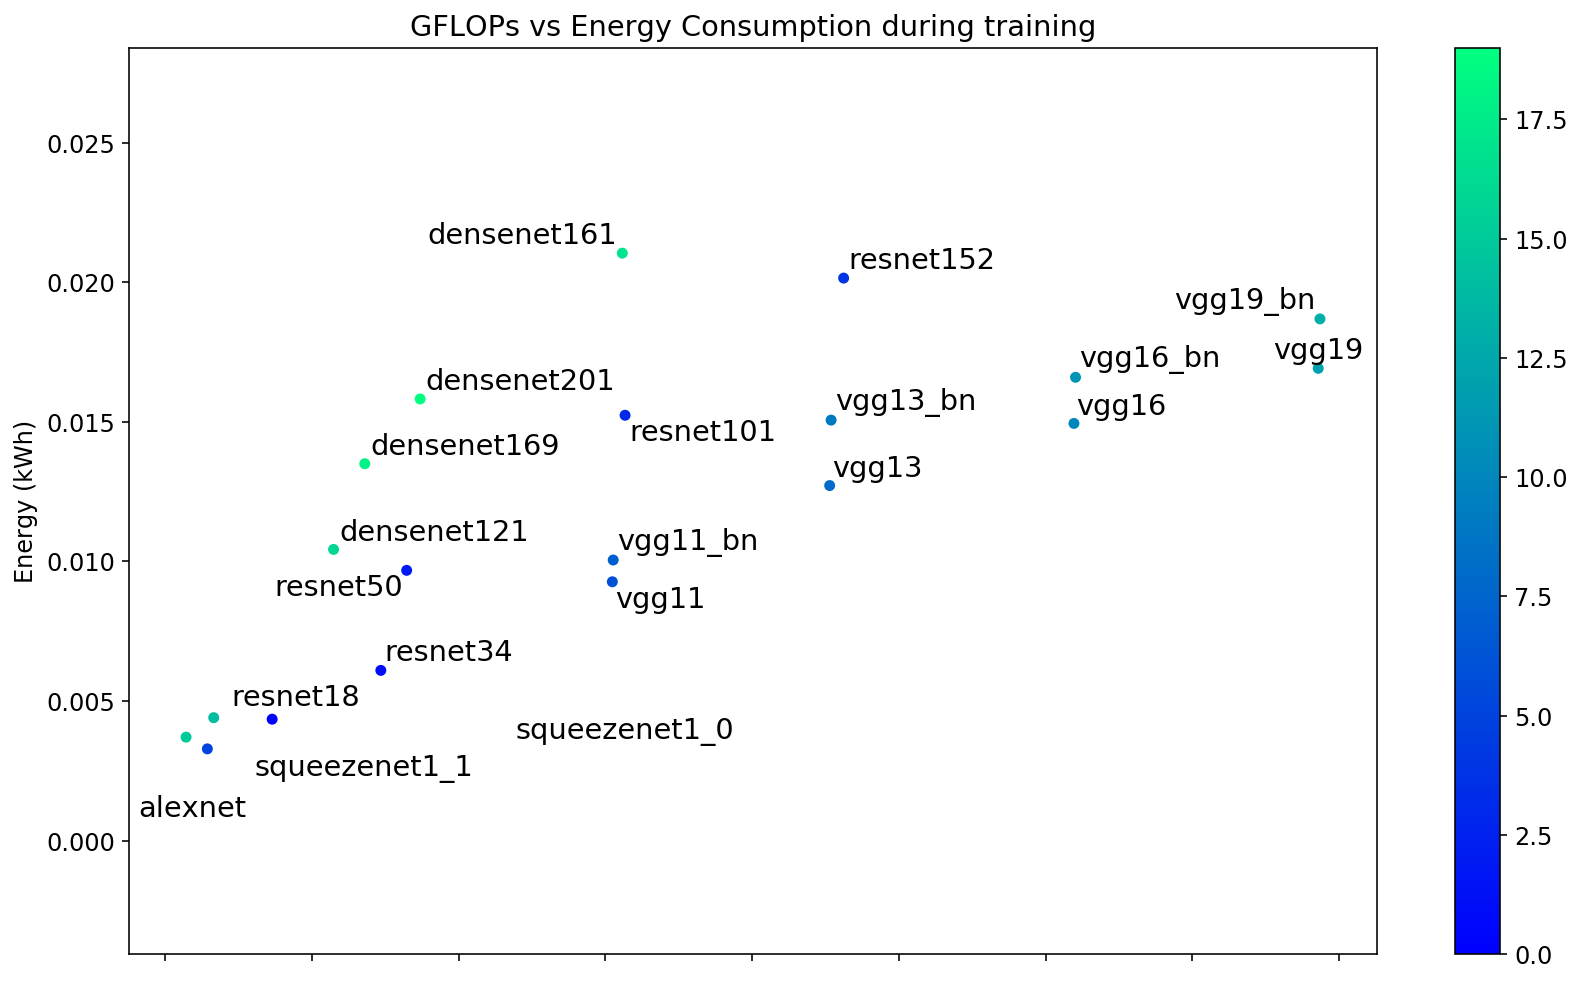

In [34]:
ax = new_df.plot('GFLOPS', 'empirical', kind='scatter',
        c=range(len(new_df)), colormap=cmap, figsize=(12,7),
                  title="GFLOPs vs Energy Consumption during training")
ax.set_xlabel("GFLOPs")
ax.set_ylabel("Energy (kWh)")
#merge_df[['GFLOPS','top1','model']].apply(lambda row: ax.text(*row),axis=1);
texts = [ax.text(x, y, name,size='large') 
         for x, y, name in zip(new_df['GFLOPS'],new_df['empirical'],new_df['model'])]
#ax.text(0.823441, 41.90, 'squeezenet1_0' )
# needs citation https://github.com/Phlya/adjustText
#colormap.remove()
adjust_text(texts)
plt.tight_layout()
ax.figure.savefig('viz/training_gflops_vs_energy.png',dpi=300)

In [50]:
from scipy import stats
x = new_df['GFLOPS']
y = new_df['empirical'] 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print('R squared ', r_value ** 2)
mse = metrics.mean_squared_error(x,y)
rmse = mse ** (1/2)
mae = metrics.mean_absolute_error(x, y)
print(f"rmse: {rmse} \nmae: {mae}")

slope 0.0006759430304555093 
intercept 0.006772710934972692
r_value 0.738822860031086
p_value 0.00019853020092928153
std_err 0.00014532113087551741
R squared  0.5458592185045137
rmse: 9.876962605119292 
 mae: 7.863347257241668


In [57]:
df_minus_densenet = new_df[new_df['model'].str.match(r'(^densenet.*)') == False]
df_minus_densenet.model.count()

16

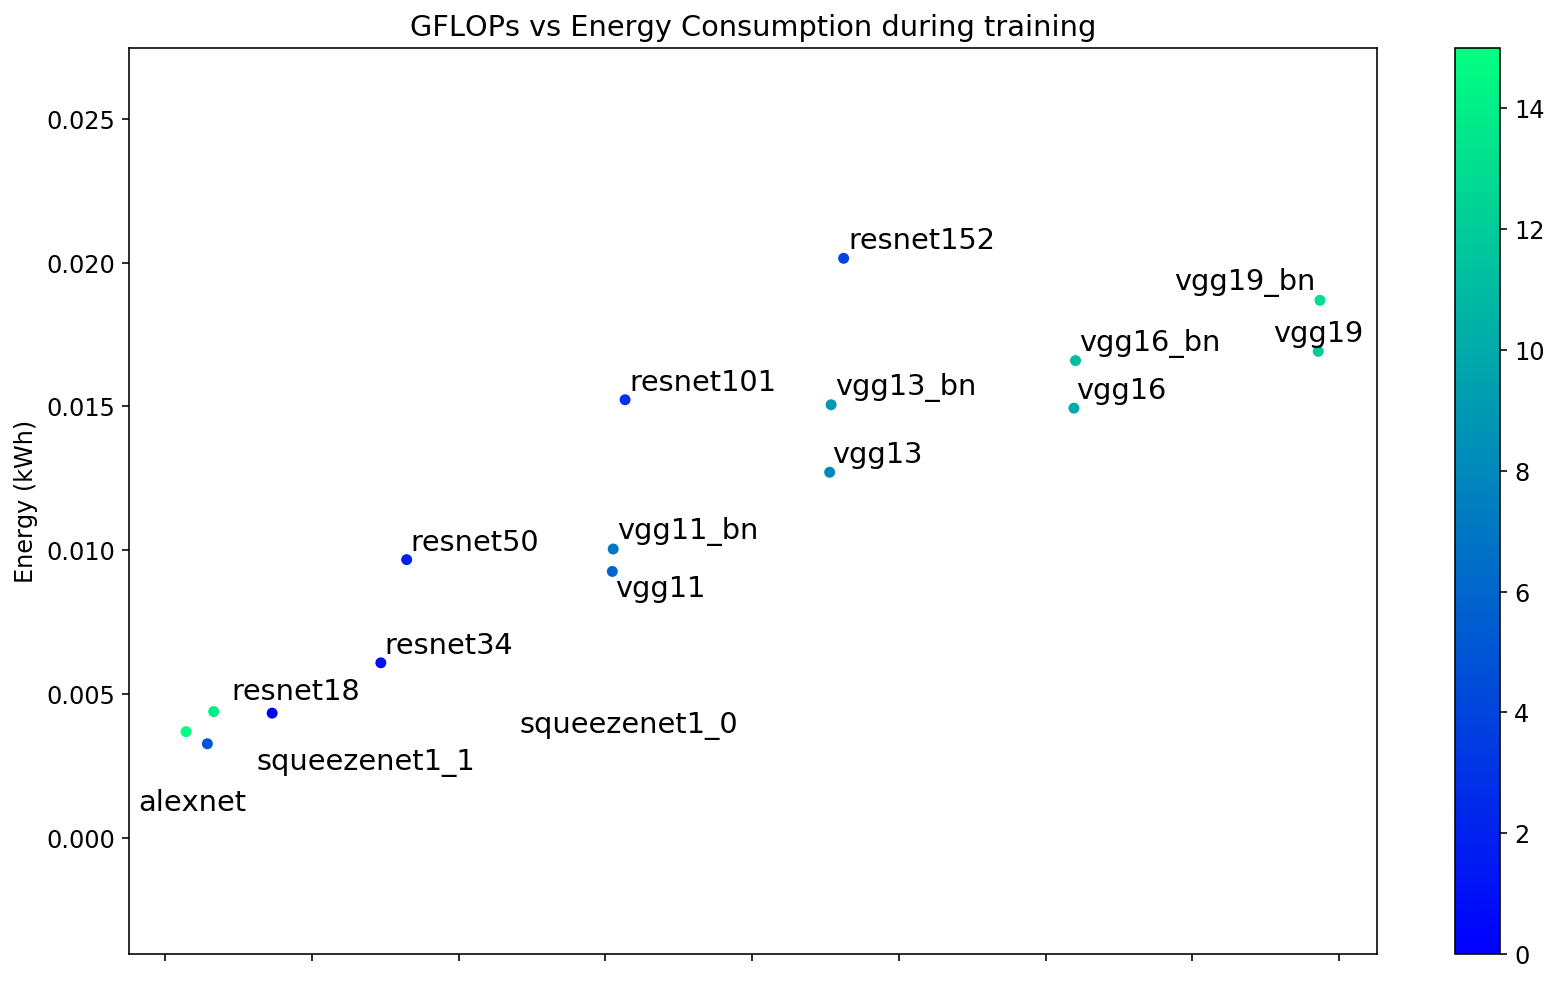

In [58]:
ax = df_minus_densenet.plot('GFLOPS', 'empirical', kind='scatter',
        c=range(len(df_minus_densenet)), colormap=cmap, figsize=(12,7),
                  title="GFLOPs vs Energy Consumption during training")
ax.set_xlabel("GFLOPs")
ax.set_ylabel("Energy (kWh)")
#merge_df[['GFLOPS','top1','model']].apply(lambda row: ax.text(*row),axis=1);
texts = [ax.text(x, y, name,size='large') 
         for x, y, name in zip(df_minus_densenet['GFLOPS'],df_minus_densenet['empirical'],df_minus_densenet['model'])]
#ax.text(0.823441, 41.90, 'squeezenet1_0' )
# needs citation https://github.com/Phlya/adjustText
#colormap.remove()
adjust_text(texts)
plt.tight_layout()
ax.figure.savefig('viz/training_removing_densenet.png',dpi=300)

In [59]:
from scipy import stats
x = df_minus_densenet['GFLOPS']
y = df_minus_densenet['empirical'] 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print('R squared ', r_value ** 2)
mse = metrics.mean_squared_error(x,y)
rmse = mse ** (1/2)
mae = metrics.mean_absolute_error(x, y)
print(f"rmse: {rmse} \nmae: {mae}")

slope 0.0007814443459271345 
intercept 0.004526382391445618
r_value 0.8974308073620292
p_value 2.432486786735814e-06
std_err 0.00010266549457551294
R squared  0.8053820540024635
rmse: 10.760061562803834 
mae: 8.68350028975


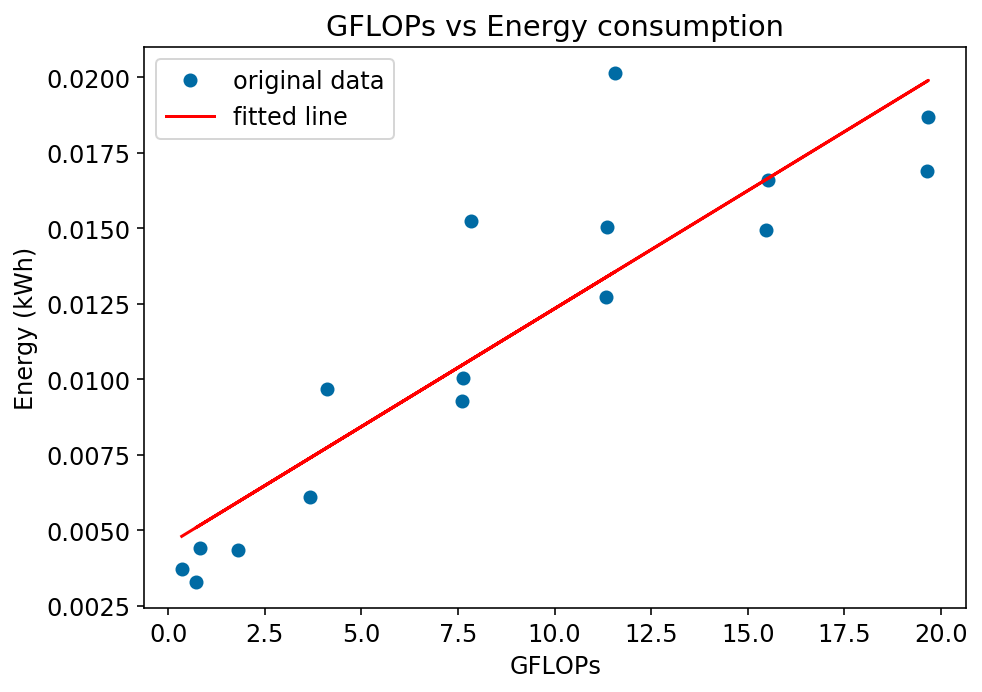

In [60]:
x = df_minus_densenet['GFLOPS']
y = df_minus_densenet['empirical']
plt.figure(figsize=(7,5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("GFLOPs")
plt.ylabel("Energy (kWh)")
plt.title("GFLOPs vs Energy consumption")
plt.legend()
plt.tight_layout()
plt.savefig('viz/training_fit_minus_densenet.png',dpi=300)

In [61]:
vgg_df = df_time_interval.merge(vgg, on='model')

In [62]:
#ax = vgg_df.plot('GFLOPS', 'power', kind='scatter')
slope, intercept, r_value, p_value, std_err = stats.linregress(vgg_df['GFLOPS'],vgg_df['power'] )
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print('R squared ', r_value ** 2)

slope 2323.789348187023 
intercept 19759.158339063408
r_value 0.938218663294201
p_value 0.0005625588376695095
std_err 349.90254351119074
R squared  0.8802542601535573


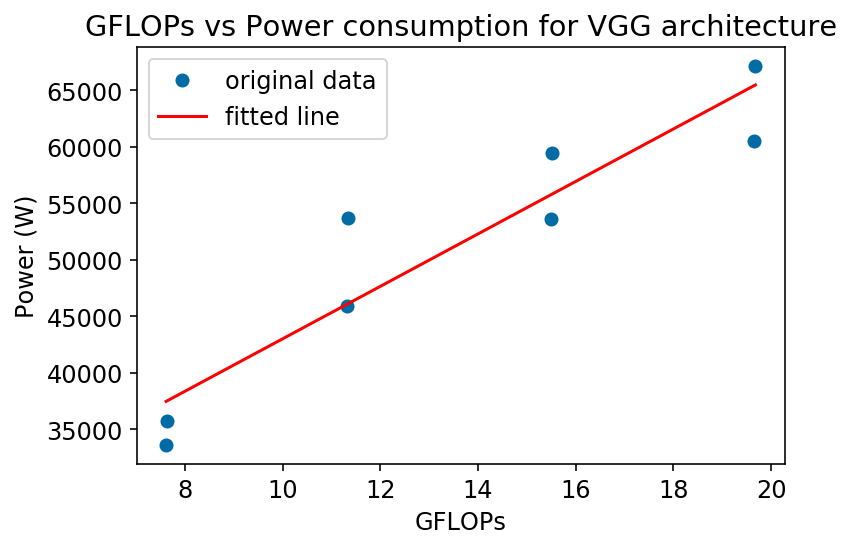

In [64]:
x = vgg_df['GFLOPS']
y = vgg_df['power']
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("GFLOPs")
plt.ylabel("Power (W)")
plt.title("GFLOPs vs Power consumption for VGG architecture")
plt.legend()
plt.tight_layout()
plt.savefig('viz/training_vgg_gflops_power_fit.png',dpi=300)

In [67]:

df_co2 = pd.read_csv("../BERT/results/co2data.csv")
uk_co2 = df_co2.loc[df_co2.country == 'United Kingdom'].impact.mean()

df_time_interval['CO2e'] = uk_co2 * df_time_interval['empirical']
df_time_interval['kg CO2e/kWh'] = df_time_interval['CO2e'] /1000

In [68]:
features = ['model','empirical','kg CO2e/kWh']
df_time_interval[features]

,model,empirical,kg CO2e/kWh
0,resnet18,0.004348,0.002709
1,resnet34,0.006096,0.003798
2,resnet50,0.009680,0.006030
3,resnet101,0.015235,0.009491
4,resnet152,0.020149,0.012553
5,alexnet,0.003284,0.002046
6,vgg11,0.009270,0.005775
7,vgg11_bn,0.010050,0.006261
8,vgg13,0.012716,0.007922
9,vgg13_bn,0.015061,0.009383
